# **Project Name**    - Real Estate Industry Project

##### **Group - 31**
Team Members: 
1. `CLARISSA ARDELIA SO, 1275582`
2. `EDWIN IGOR BROTOATMODJO, 1275566`
3. `PATRICK POON PAN, 1170587`
4. `VANESSA GRACIA TAN, 1297696`
5. `WILLIAM CONLON, 1169893`

# **Project Summary**

In recent times, high interest rates have discouraged many people from purchasing homes, leading to a significant uptick in the number of people choosing to rent properties instead. This shift in the market dynamics presents a unique opportunity for savvy investors.

We can harness the power of Artificial Intelligence (AI) and Machine Learning (ML) to make informed investment decisions in Melbourne's real estate market. AI and ML technologies can analyze vast amounts of data and market trends. They can accurately predict the demand for rental properties and provide forecasts for future prices. This predictive capability can give us a significant cutting edge in the market.

To make things even more exciting for potential investors, we have developed a ML-powered suburb ranking system. This system is designed to tailor metrics to your specific investment priorities. It helps you identify the most promising areas for your rental property investments.

This project is divided into 7 sections: '*Data Exploration & Retrieval*',  '*Exploratory Data Analysis*',  '*Extract, Transform, & Load*',  '*Feature Engineering*',  '*Feature Selection*',  '*Modelling, Predictions, & Analysis*', and '*Remarks*'.

# **GitHub Link**

https://github.com/MAST30034-Applied-Data-Science/real-estate-industry-project-open-source-industry-project-31

# **Problem Statement**

**BUSINESS PROBLEM STATEMENT**

1. What are the most important internal and external features in predicting rental prices?
2. What are the top 10 suburbs with the highest predicted growth rate?
3. What are the most livable and affordable suburbs according to your chosen metrics?

# **Let's Begin !**

## **1. Data Exploration & Retrieval**

**Main Dataset**

**Internal**:
The main dataset is extracted from `domain.com.au`, which records the rental properties and their corresponding features, including `Address`, `Prices`, `Number of Bedroom`, `Number of Bathroom`, `Number of Parking`, and `Unit Type`. 

**External**:
In addition to the property data, official statistics data on a wide range of economic, social, population and environmental matters of importance to Australia published by Australia Bureau of Statistics (ABS) is used to provide more details to support the analysis of rental properties.

**Supporting External Dataset**

1. PTV Train Station Data
2. PTV Tram Stop Data
3. School Location Data
4. Landmarks Data
5. Crime & Offence Data
6. Moving Annual Rent By Suburb (Quarterly) Data

## **2. Extract, Transform, Load**

**Property Dataset**

It is found that
*   There are **10125 rows and 6 columns**, out of which one is **Prices**, which is the the dependent variable to be predicted
*   There are **906 duplicated data** in the dataset, which we removed

Then we
*   Extract the numerical values from `Prices` column
*   Remove the rows with missing `Prices` values
*   Clean the `Address` column


**ABS Dataset**
*   Extract only relevant features


## **3. Exploratory Data Analysis**

After joining all the internal and external datasets together, we did preliminary analysis on the property, property prices, and property unit type.

In [5]:
# importing library
from IPython.display import Image
import pandas as pd

## Areas of Interest

Now let's take a closer look at the dataset that underpins our analysis. In this map, you can see the geographical distribution of our rental properties, highlighting the area of interest for our analysis, which is the Melbourne area. 

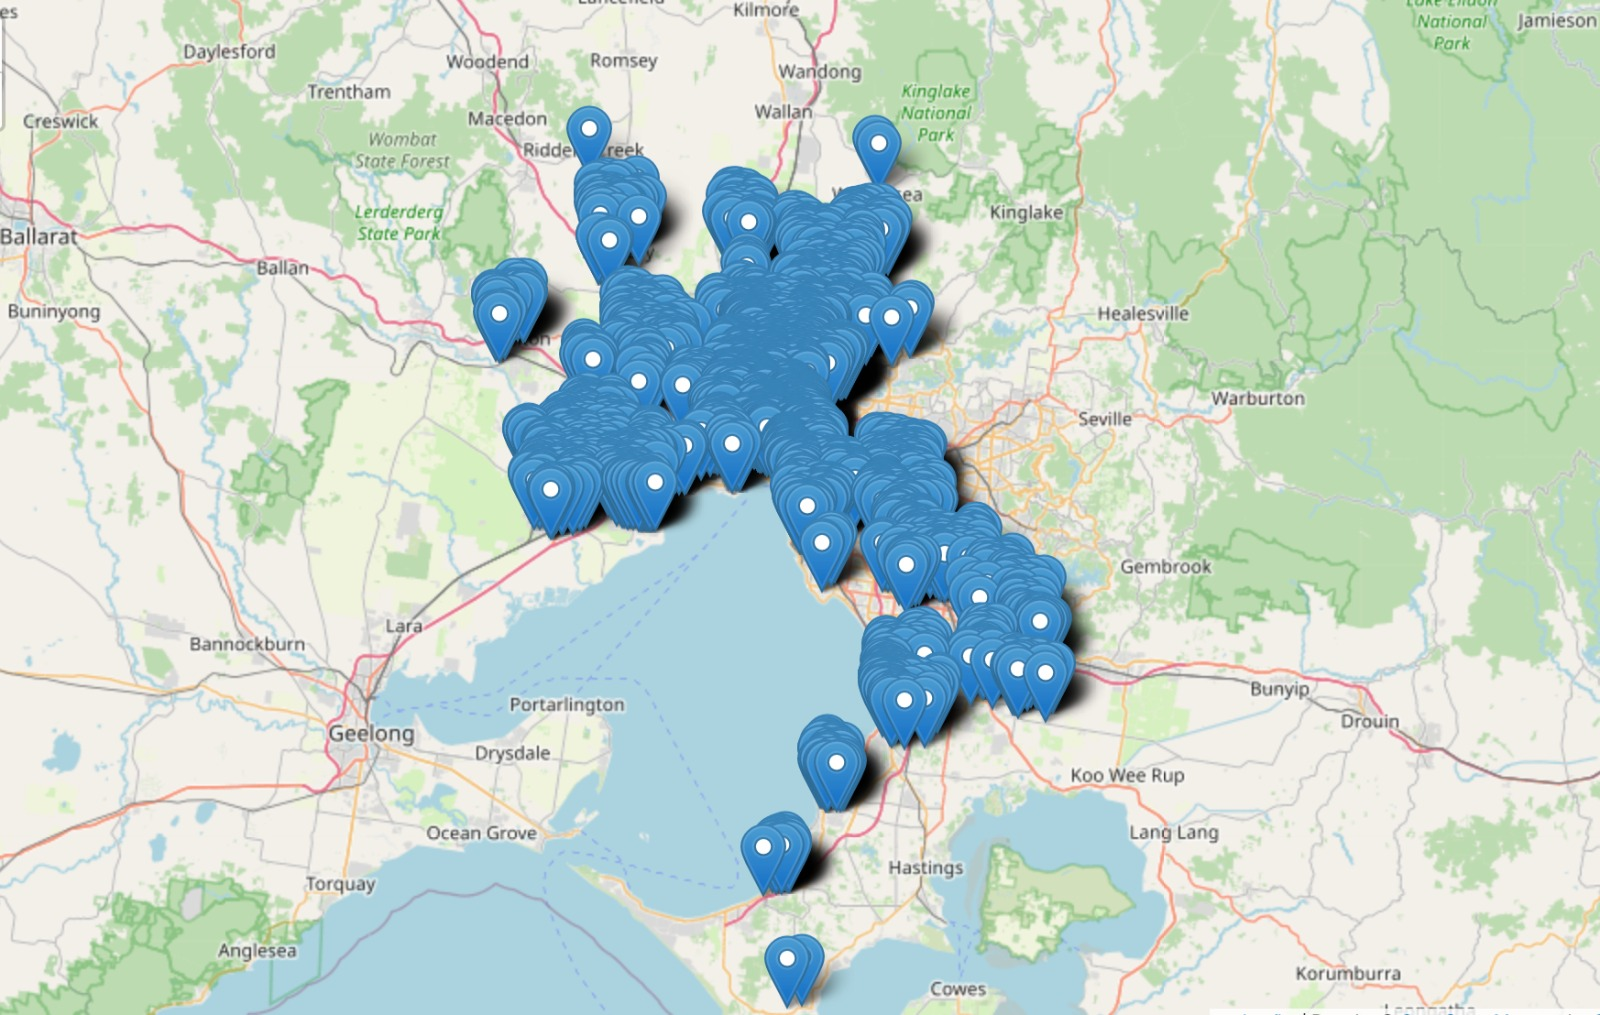

In [20]:
# Define the path
file_path = '../plots/property_map.jpeg'

# Display the image
Image(filename=file_path)

## House Rental Price Distribution

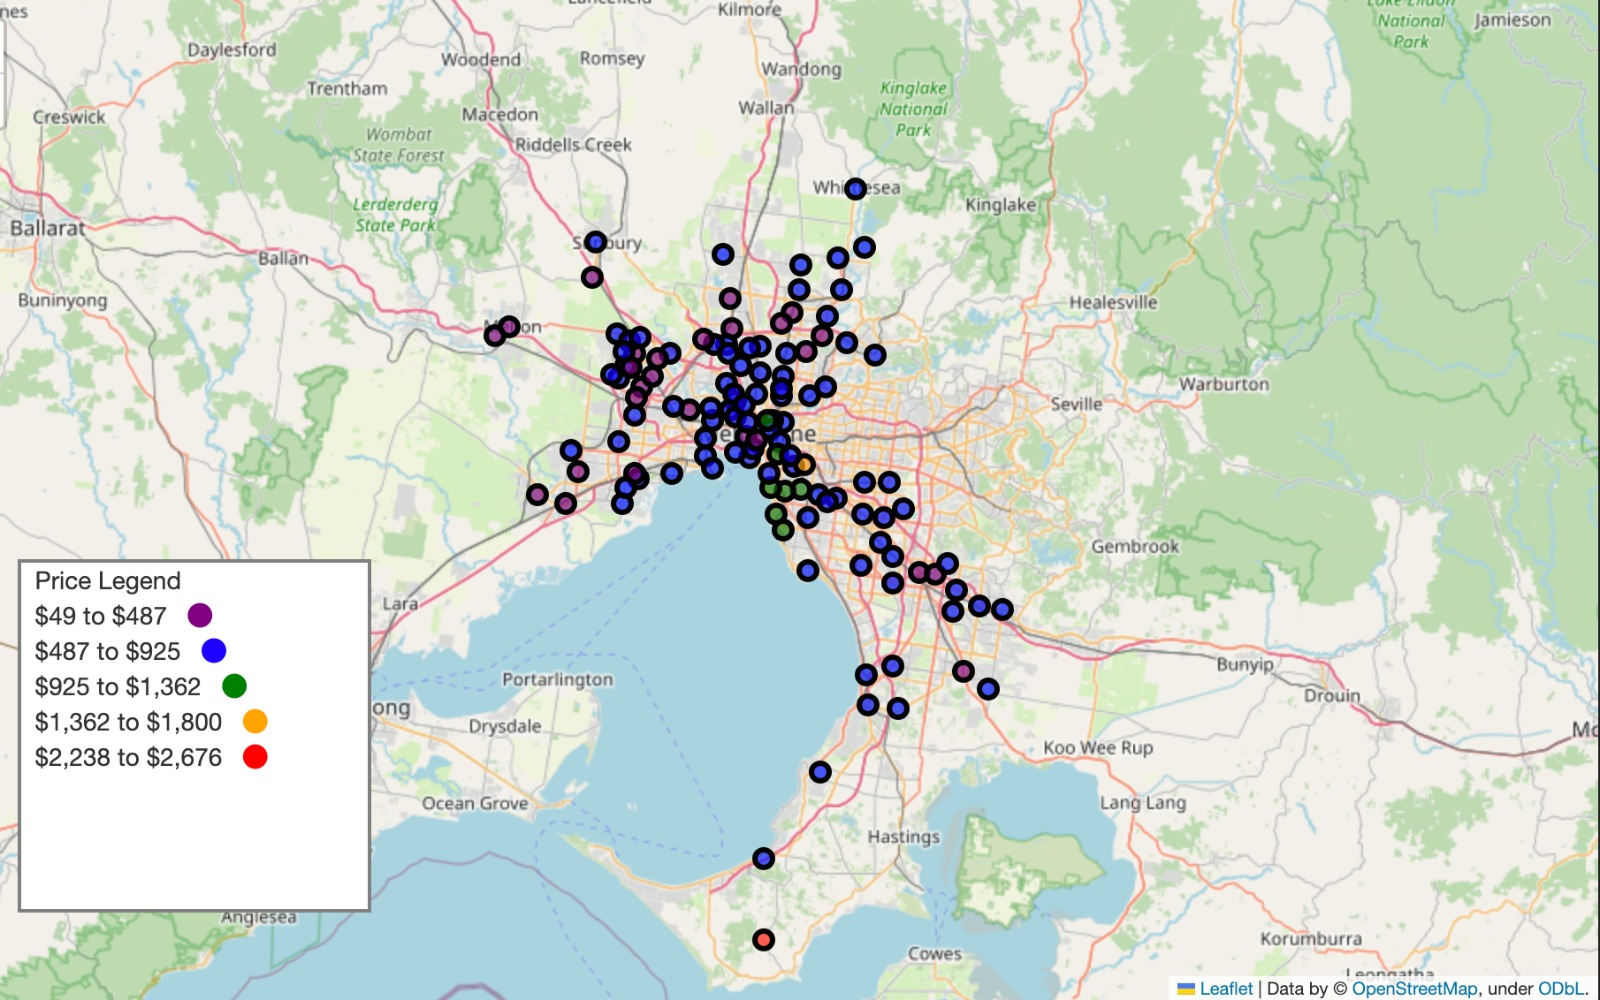

In [19]:
# Define the path
file_path = '../plots/house.jpeg'

# Display the image
Image(filename=file_path)

## Apartment Rental Price Distribution

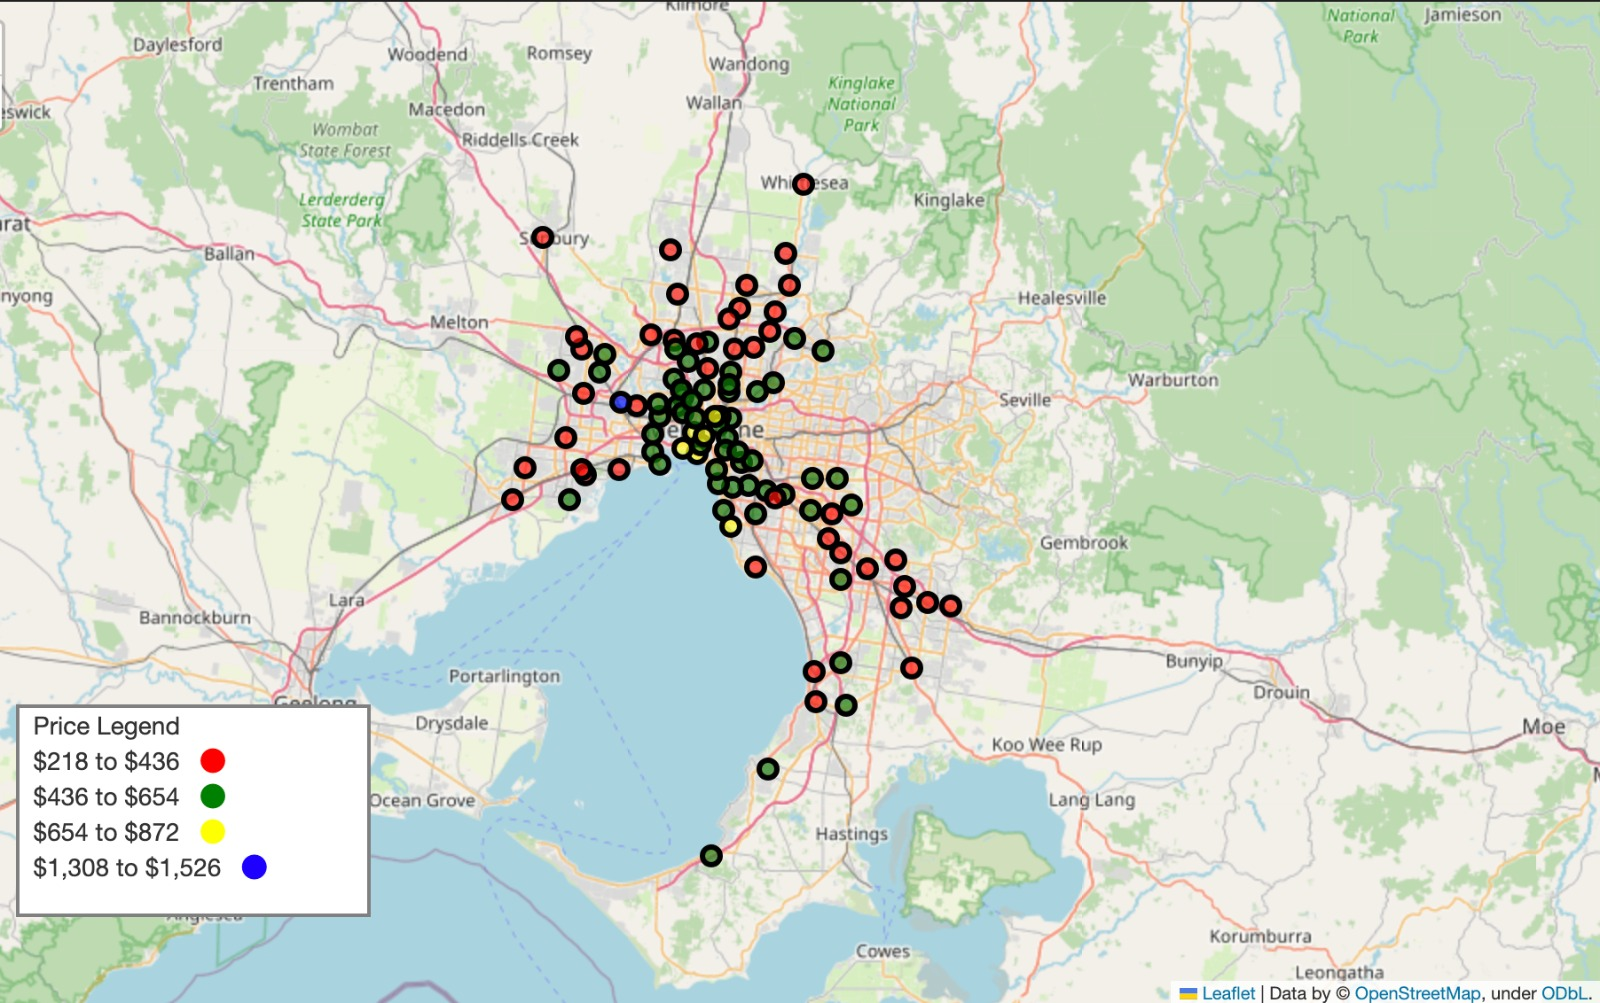

In [17]:
# Define the path
file_path = '../plots/apartment.jpeg'

# Display the image
Image(filename=file_path)

## Townhouse Rental Price Distribution

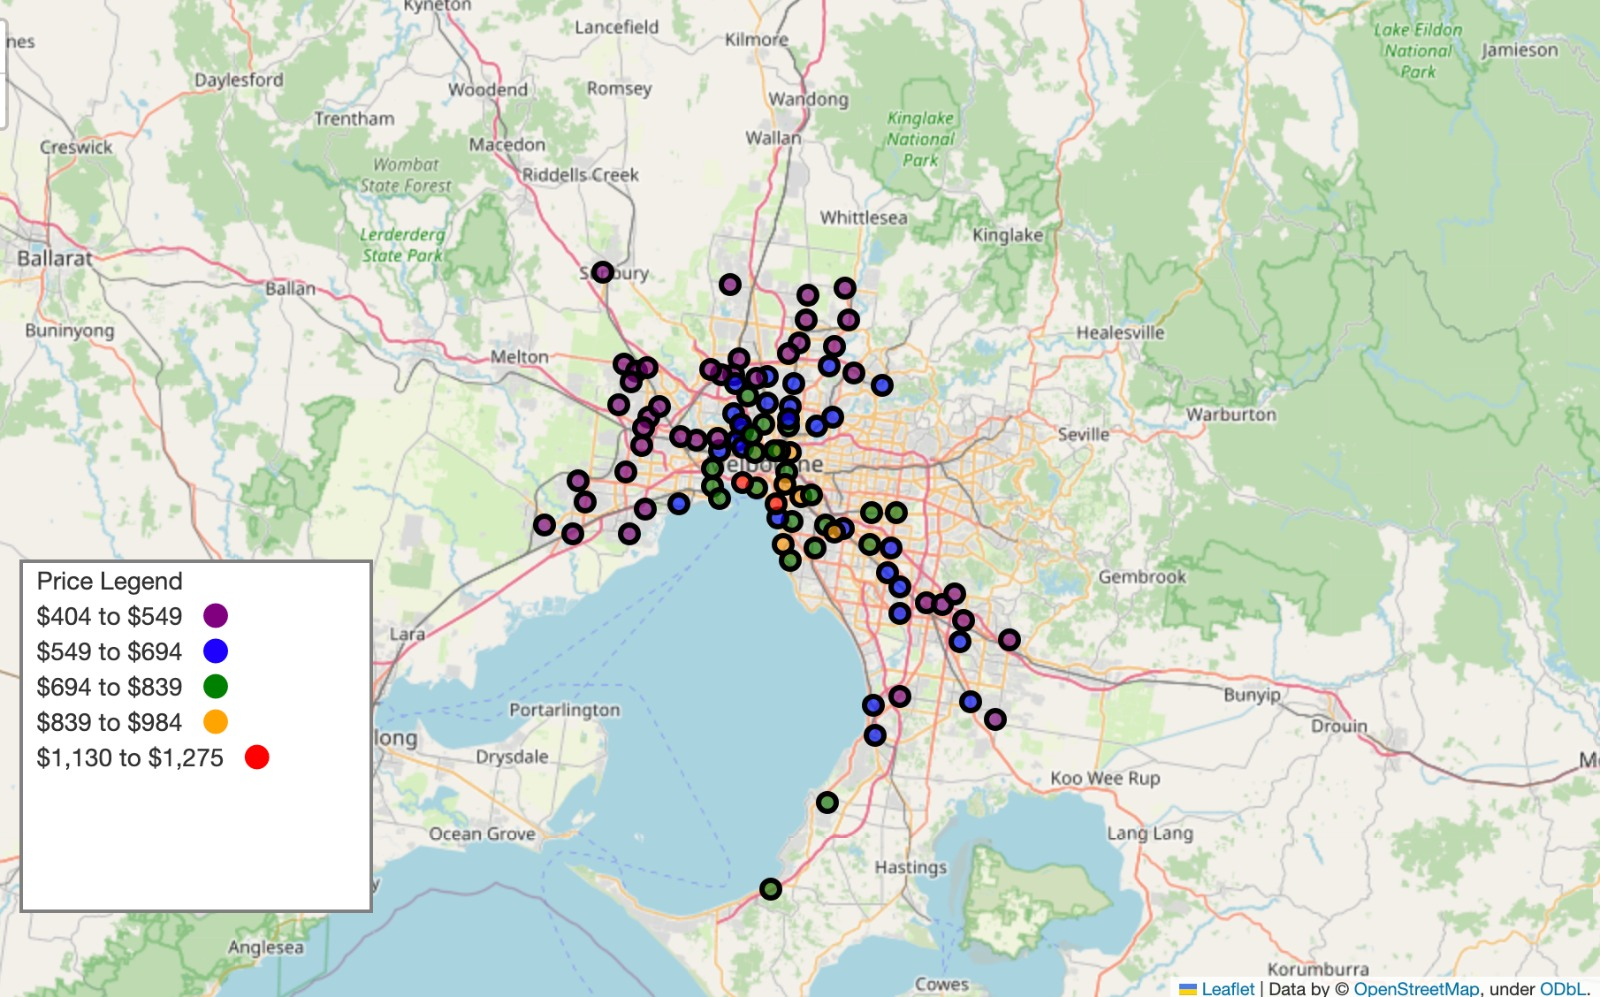

In [16]:
# Define the path
file_path = '../plots/townhouse.jpeg'

# Display the image
Image(filename=file_path)

Categorized into three types, there's a clear trend in the rental property prices across Melbourne - the further we move away from the CBD, the more affordable rental properties become on average. However, obviously rental prices are not solely determined by distance from the CBD. We can see unique exceptions, like Flinders, which is located in the southern part of Melbourne and boasts the highest rental prices for houses. So what other important features that determine rental property prices?

## **4. Feature Engineering**

In this section, geocoding is done by extracting the longitude and latitude of rental property addresses. Additionally, the distance between amenities (landmarks, schools, facilities), accessibility (tram stops and train stations), and rental properties is calculated.

Furthermore, new feature engineering including number of near facilities and transports and distance to CBD is implemented.

## **5. Feature Selection**

Feature selection is implemented to determine which features impacting the rental property price. After trying some of the machine learning model, we decided to use Lasso Regression and Akaike information criterion (AIC) as they have reasonable result.

## Heatmap

Below is the heatmap presenting correlation between each of the internal and external features.

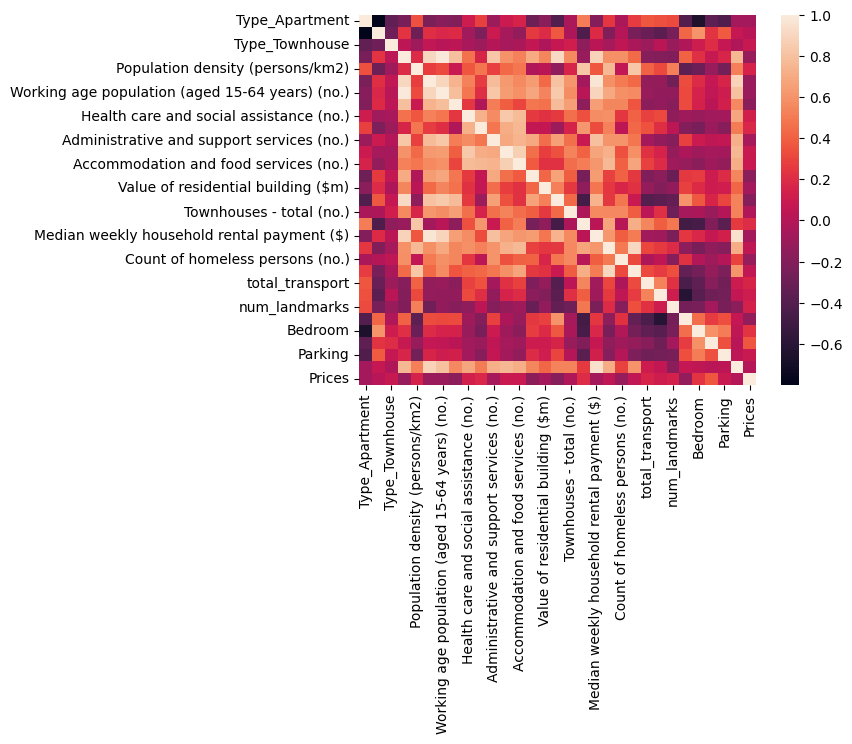

In [15]:
# Define the path
file_path = '../plots/heatmap.png'

# Display the image
Image(filename=file_path)

## Linear Regression

Using a simple linear regression model, we predicted the median rental payment against our other ABS data, below is the graph showing the relationship between median rental payment and other ABS features.

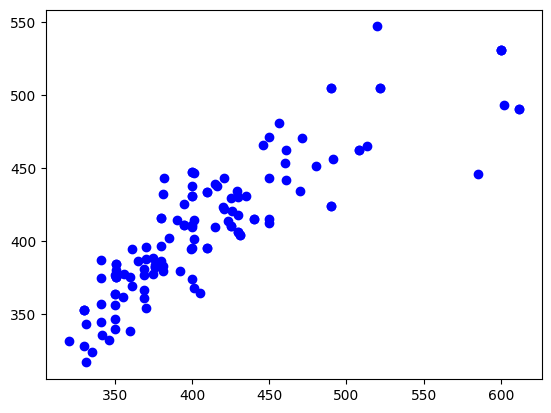

In [3]:
# Define the path
file_path = '../plots/abs_prices_relationship.png'

# Display the image
Image(filename=file_path)

## Akaike Information Criterion (AIC) Feature Importance

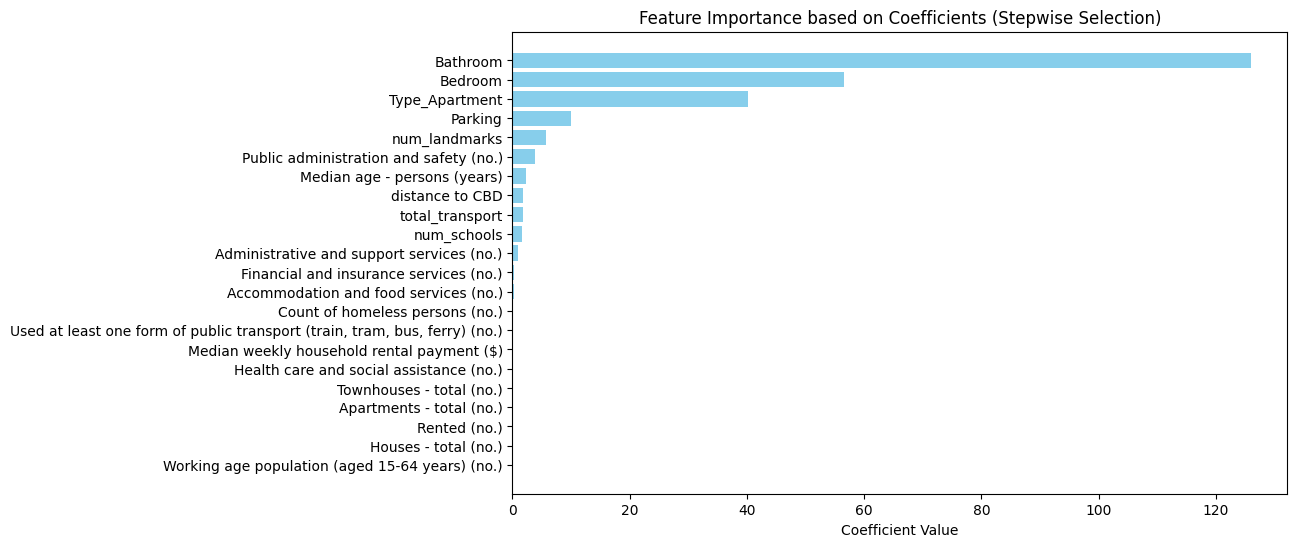

In [21]:
# Define the path
file_path = '../plots/AIC feature selection.png'

# Display the image
Image(filename=file_path)

## Lasso Feature Importance

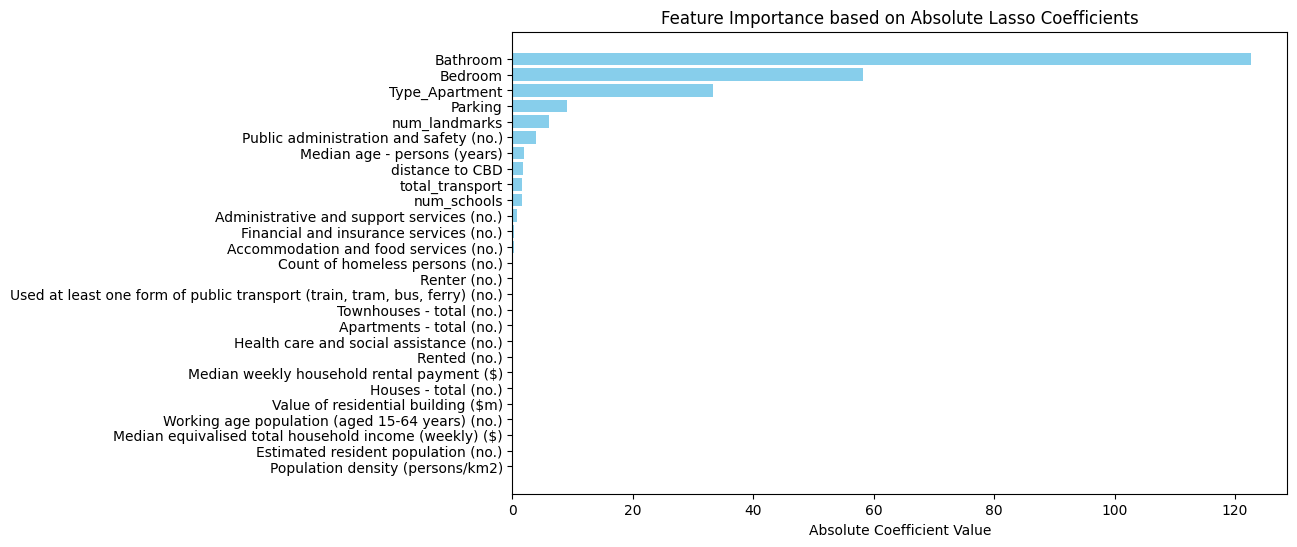

In [22]:
# Define the path
file_path = '../plots/lasso feature selection.png'

# Display the image
Image(filename=file_path)

As a result, the features selected from feature selection are 
* `Number of Bathroom`
* `Number of Bedroom`
* `Property Type (Apartment)`
* `Number of Parkings`
* `Number of 'Places of Interest'`
* `Public administration and safety (no.)`
* `Median age (years)`
* `Distance to CBD` 
* `Total transport`
* `Number of Schools`
* `Administrative and support services (no.)`
* `Financial and insurance services (no.)`
* `Accommodation and food services (no.)`
* `Count of homeless persons (no.)`
* `Rented (no.)`
* `Townhouses - total (no.)`
* `Used at least one form of public transport (train, tram, bus, ferry) (no.)`
* `Median weekly household rental payment ($)`
* `Health care and social assistance (no.)`
* `Apartments - total (no.)`
* `Working age population (aged 15-64 years) (no.)`
* `Houses - total (no.)`

## **6. Modelling, Predictions, & Analysis**

## Predicted Growth

From the graph below, it can be seen that there is significant dip on rental prices over the last three years surrounding metro areas during the pandemic. 

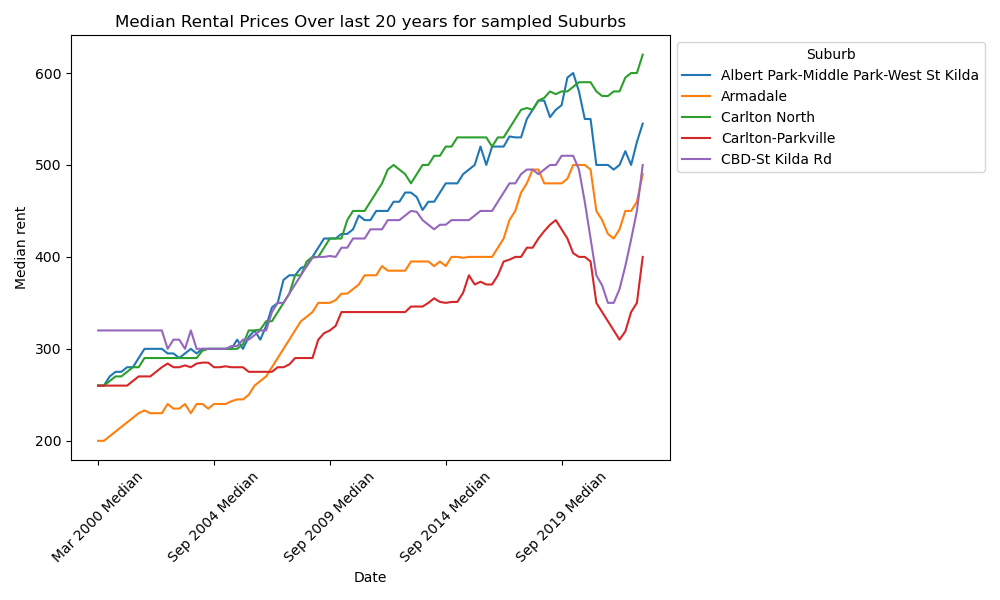

In [23]:
# Define the path
file_path = '../plots/median_metro_prices_20.png'

# Display the image
Image(filename=file_path)

Here, we have the median rental prices for suburbs with the highest growth in the past. In this graphical analysis, we captured continuous growth for rural suburbs despite the pandemic.

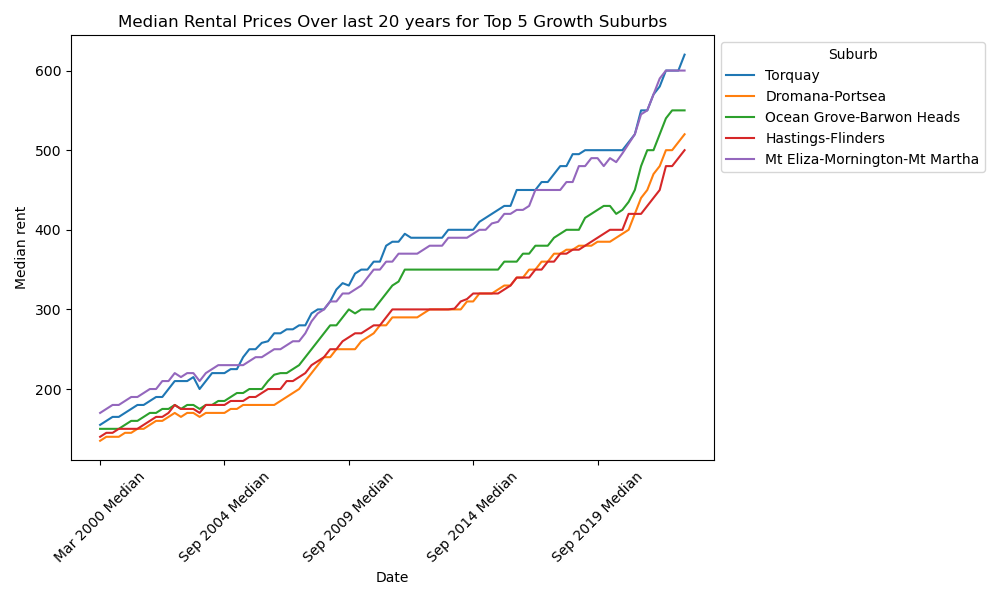

In [24]:
# Define the path
file_path = '../plots/median_rural_prices_20.png'

# Display the image
Image(filename=file_path)

To ensure our analysis was not skewed by the pandemic, we looked at the growth from 2015 to 2019. The trend of rural areas outpacing their urban counterparts in growth remained consistent. 

This could be due to: 
* Income changes
* Regional gentrification
* Investors fueling the price changes

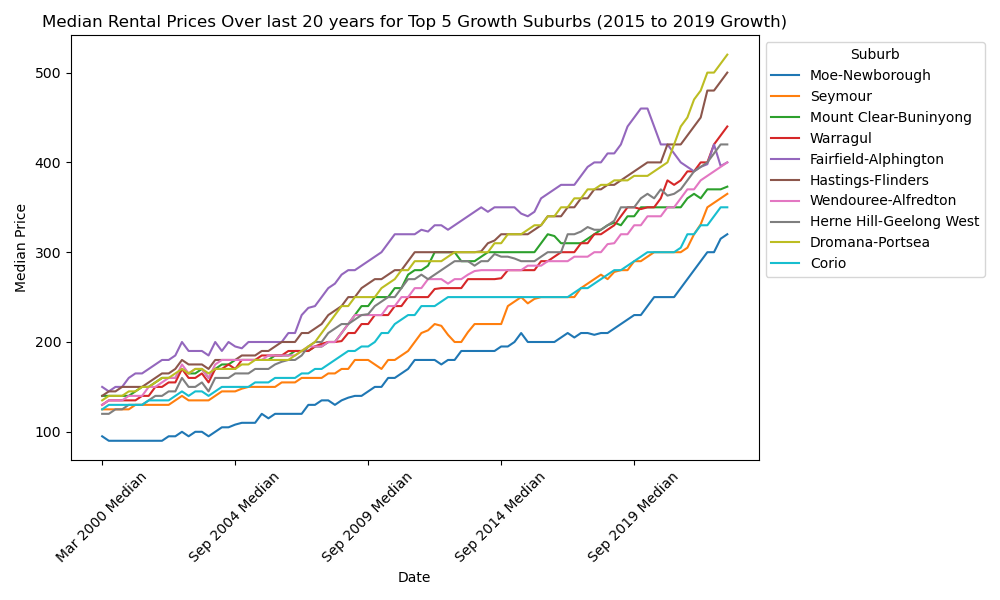

In [25]:
# Define the path
file_path = '../plots/median_nocovid_prices_20.png'

# Display the image
Image(filename=file_path)

## Growth vs Variability

Robust OLS Linear Regression model is used to further validate our findings. Below data are the suburbs with the highest predicted growth rate. 

In [6]:
growth_suburbs = pd.read_csv('../data/curated/10_growth_suburbs.csv')
growth_suburbs

,Unnamed: 0,Suburb,Predicted Value in 3 Years,Growth Rate
0,132,Morwell,435.840622,0.108475
1,137,Shepparton,501.389901,0.096808
2,131,Moe-Newborough,415.169688,0.090666
3,135,Sale-Maffra,502.485838,0.079000
4,106,Hastings-Flinders,616.932869,0.072563
5,125,Benalla,484.920952,0.070758
6,118,Sebastopol-Delacombe,478.157554,0.070292
7,142,Warragul,534.060170,0.066709
8,134,Portland,461.098616,0.066604
9,113,Lara,585.812600,0.064974


In addition to our findings, we also took note of the standard deviation. It can be seen that urban areas displayed a high standard deviation, meaning that the price is volatile and might be more risky to invest in these areas. 

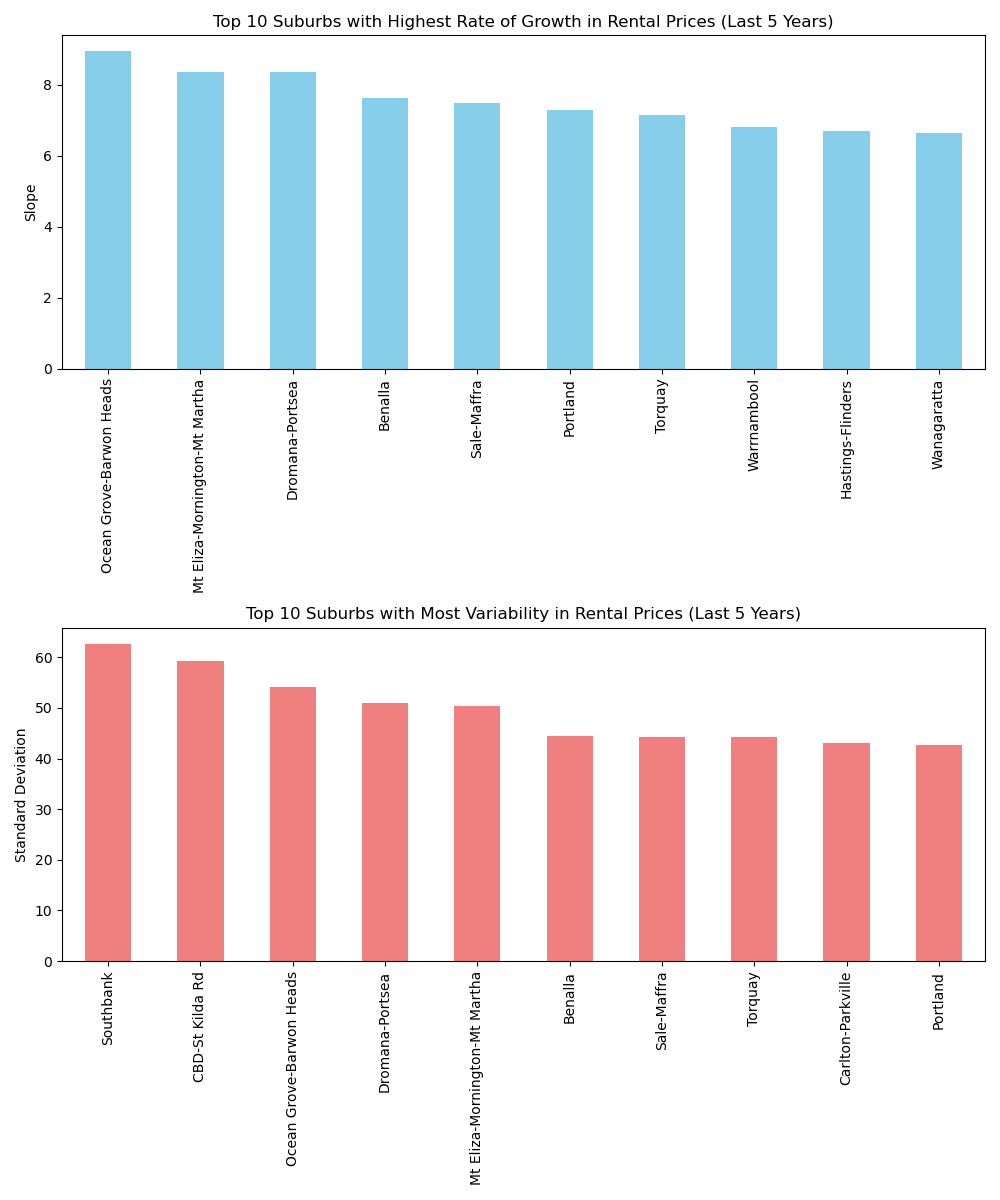

In [26]:
# Define the path
file_path = '../plots/highest_growth_variability.png'

# Display the image
Image(filename=file_path)

## 2026 Rental Price Forecast

Given its ability to adapt to data trends and its superior forecasting ability, Auto ARIMA is used as it offers a more accurate prediction than linear regression, in terms of predicting 3 year-rental price. 

Thus, the top 10 suburbs were mostly in regional Victoria with Morwell, Shepparton, and Moe as the top suburbs poised for growth. As a investor, these are the areas we believe will have significant growth. 

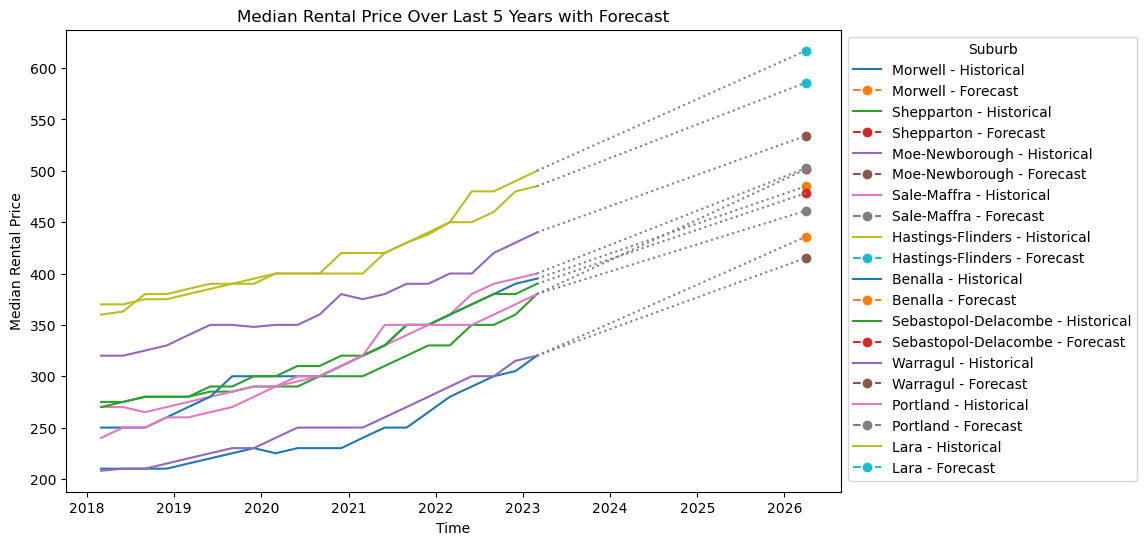

In [7]:
# Define the path
file_path = '../plots/growth_forecast_20.png'

# Display the image
Image(filename=file_path)

## Liveability

Liveability score is calculated using weighted average formula. 

The weighted metrics used for liveability score: 
* Crime rate (25%)
* Health care (20%)
* Environment / Amenities (25%)
* Education (10%)
* Transport Accessibility (20%)

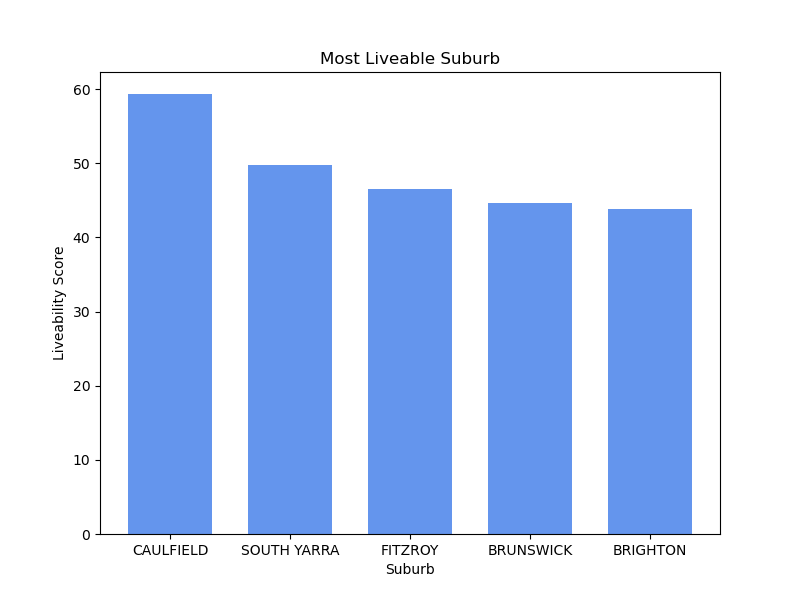

In [28]:
# Define the path
file_path = '../plots/liveable_suburb.png'

# Display the image
Image(filename=file_path)

## Affordability

Affordability is measured using Rental Affordability Index with 30% Income Rule as benchmark.

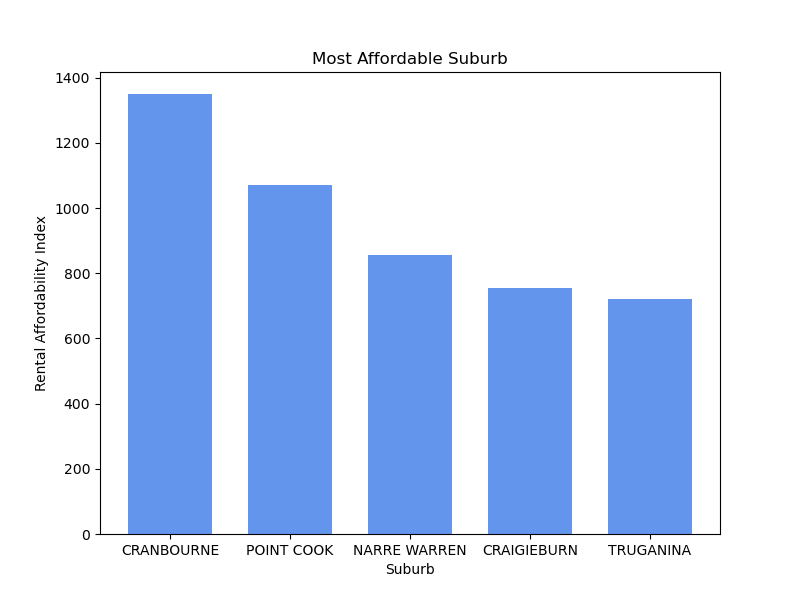

In [29]:
# Define the path
file_path = '../plots/affordable_suburb.png'

# Display the image
Image(filename=file_path)

## Investability

While it is an instinct to put money in fancy buildings in liveable areas such as South Yarra
and Fitzroy, our forecast as displayed below suggests that the growth rate for the both suburbsis 0.5% and 2.3%, respectively. This may due to the suburb reaching a price plateau and struggle to increas in value. Therefore, a recommendation would be to combind liveability and affordability, looking into areas further out like Caulfield and Brunswick, with growth rate 6.4% and 3.7%, respectively.

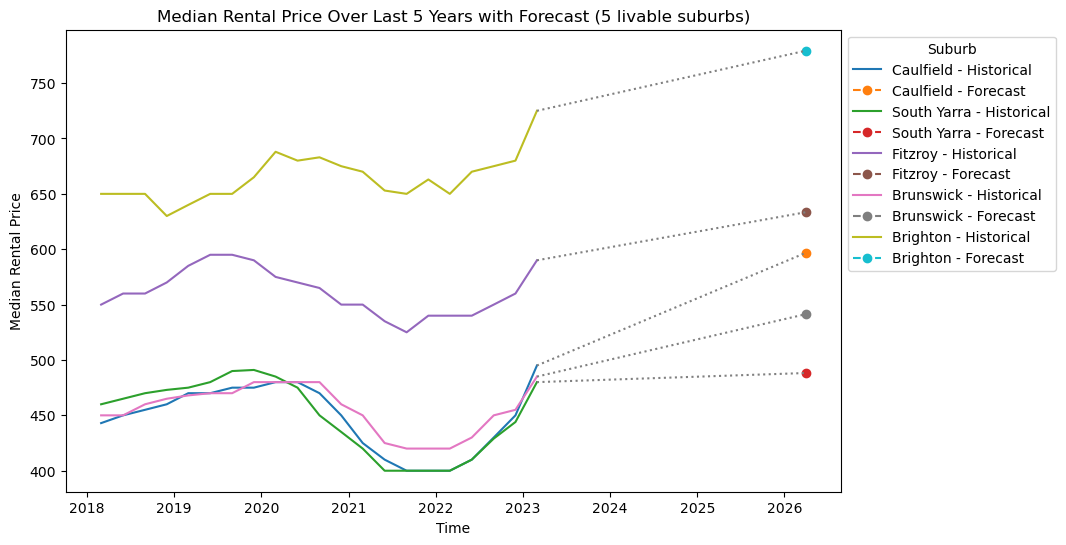

In [8]:
# Define the path
file_path = '../plots/growth_liveable.png'

# Display the image
Image(filename=file_path)

In [9]:
growth_rate = pd.read_csv('../data/curated/liveable_growth_rate.csv')
growth_rate

,Unnamed: 0,Suburb,Predicted Rent in 3 Years,Growth Rate
0,Caulfield,Caulfield,596.705421,0.064269
1,South Yarra,South Yarra,488.229214,0.005682
2,Fitzroy,Fitzroy,633.404255,0.023944
3,Brunswick,Brunswick,541.344966,0.037315
4,Brighton,Brighton,779.255319,0.024347


## **7. Remarks**

Further analysis using features, growth, and chosen metrics, Brunswick has relatively high potential as it seats in rank 4 and 8 in liveability and affordability, respectively. In addition, it can be seen that Brunswick also has relatively high predicted growth rate (3.7%) amongst other suburb.

## Limitations

**1. Data lag, quality, and availability** 

Our forecasts' accuracy is largely dependent on the quality and accessibility of the data. Predictions made with inaccurate or partial data may not be as trustworthy. Real estate markets change rapidly. The availability of data may lag behind its acquisition. Integrate real-time data sources or APIs to keep our forecasts and data updated with the current market. Identify trends and patterns using historical data analysis to decrease the impact of data lag.

**2. Livability Objectiveness**

Our determinate views and weights assigned to our criteria for determining livability may differ from other subjective views of individuals. Thus, our conclusions are limited by the experiences and emotions of individuals. When seeking to perform these ranking and calculations, one should choose their own determining factors for how they choose to represent liveability.

**3. Run Time**

Run time for collecting the rental data off the internet and calculating their distances to points of interest such as the CBD was found to cost a large amount on processing time, overall slowing the project down from the start. Improving upon the code algorithms
in addition to employing parallel processing could potentially show a huge decrease in process time.



## Proof of Concept

This project is worth pursuing in the future because it will allow investors to:
1. Stay Ahead of the Market 
2. Spot trends and opportunities for investments, great Return on Investment (ROI)
3. Rest easy knowing to have a reliable guide trough the volatile rental market.